# Exploración inicial de datos farmacéuticos

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración para visualización
plt.style.use('seaborn-v0_8')


In [14]:

# Cargar dataset de muestra procesado (previamente generado)
df = pd.read_csv("/content/demoDatosProcesados.csv")

print("Filas cargadas:", len(df))
df.head()


Filas cargadas: 49


,ClienteID,NombreCliente,Edad,Ciudad,ProductoID,NombreProducto,CategoríaProducto,FechaCompra,Cantidad,PrecioUnitario,FechaCompra_parsed,TotalVenta
0,C00001,Mtro. Modesto Hurtado,31,Nueva Paraguay,P485,Magnesio,Suplemento,4/5/2025,5,70.39,4/5/2025,351.95
1,C00002,Hugo Marisela Trujillo,76,San Luis Manuel los bajos,P398,Cetirizina,Antihistamínico,18/12/2024,1,116.89,12/18/2024,116.89
2,C00003,Rosa Eugenia Portillo,18,San Aida los altos,P353,Diclofenaco,Analgésico,21/06/2024,2,152.11,6/21/2024,304.22
3,C00004,Alfredo Regalado,42,San Luis Manuel los bajos,P349,Fexofenadina,Antihistamínico,21/08/2024,5,37.37,8/21/2024,186.85
4,C00005,Beatriz Irene Toro Serrano,35,San Cristian los altos,P284,Ranitidina,Antiácido,10/7/2024,3,66.73,10/7/2024,200.19


In [15]:

# Información del DataFrame
df.info()

# Revisión de nulos
print("\nNulos por columna:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ClienteID           49 non-null     object 
 1   NombreCliente       49 non-null     object 
 2   Edad                49 non-null     int64  
 3   Ciudad              49 non-null     object 
 4   ProductoID          49 non-null     object 
 5   NombreProducto      49 non-null     object 
 6   CategoríaProducto   49 non-null     object 
 7   FechaCompra         49 non-null     object 
 8   Cantidad            49 non-null     int64  
 9   PrecioUnitario      49 non-null     float64
 10  FechaCompra_parsed  49 non-null     object 
 11  TotalVenta          49 non-null     float64
dtypes: float64(2), int64(2), object(8)
memory usage: 4.7+ KB

Nulos por columna:
ClienteID             0
NombreCliente         0
Edad                  0
Ciudad                0
ProductoID            0
NombrePro

In [16]:

# Crear KPIs iniciales
kpis = {
    "Ventas Totales": df["TotalVenta"].sum(),
    "Número de Transacciones": len(df),
    "Ticket Promedio": df["TotalVenta"].mean(),
    "Clientes Únicos": df["ClienteID"].nunique(),
    "Productos Únicos": df["ProductoID"].nunique()
}

pd.DataFrame.from_dict(kpis, orient="index", columns=["Valor"])


,Valor
Ventas Totales,14154.740000
Número de Transacciones,49.000000
Ticket Promedio,288.872245
Clientes Únicos,49.000000
Productos Únicos,44.000000


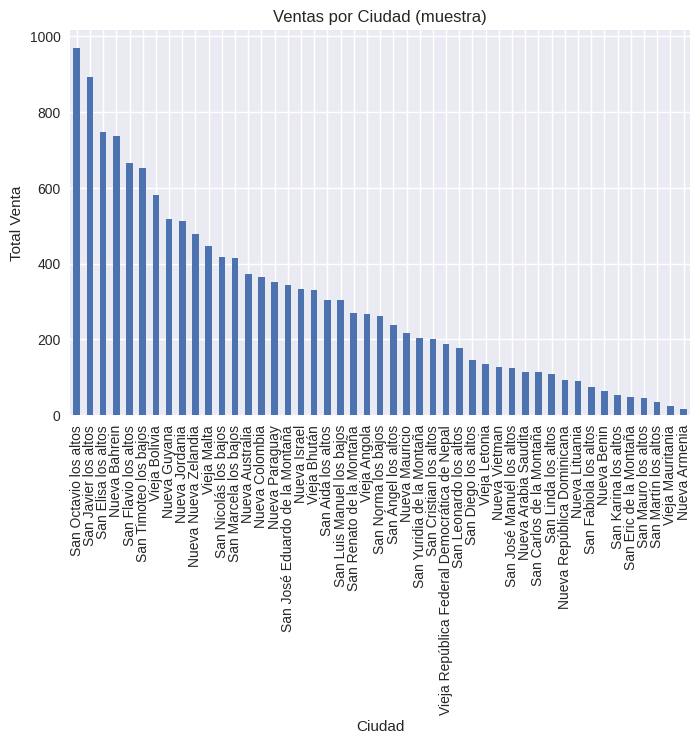

In [17]:

ventas_ciudad = df.groupby("Ciudad")["TotalVenta"].sum().sort_values(ascending=False)
ventas_ciudad.plot(kind="bar", figsize=(8,5))
plt.title("Ventas por Ciudad (muestra)")
plt.ylabel("Total Venta")
plt.xticks(rotation=90)
plt.show()


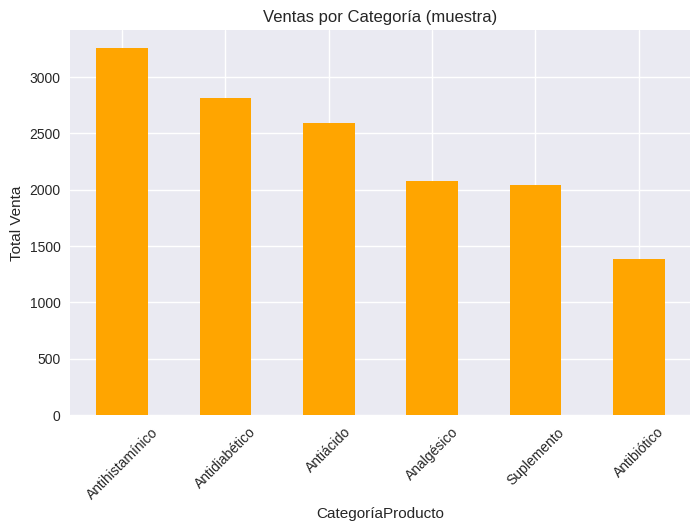

In [18]:

ventas_categoria = df.groupby("CategoríaProducto")["TotalVenta"].sum().sort_values(ascending=False)
ventas_categoria.plot(kind="bar", figsize=(8,5), color="orange")
plt.title("Ventas por Categoría (muestra)")
plt.ylabel("Total Venta")
plt.xticks(rotation=45)
plt.show()


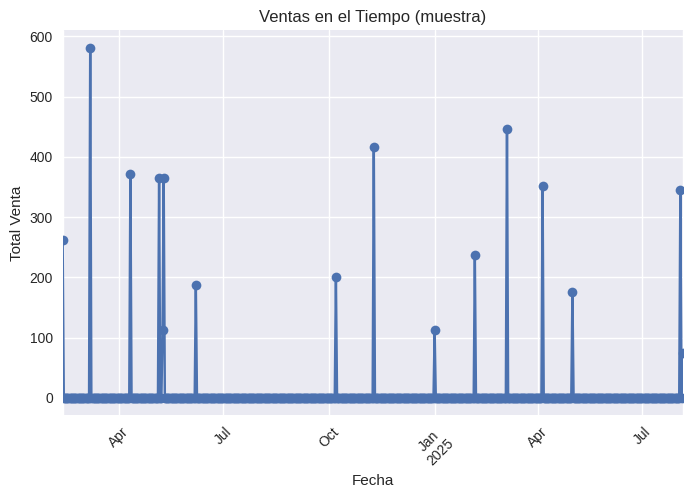

In [19]:

df["FechaCompra_parsed"] = pd.to_datetime(df["FechaCompra"], errors="coerce")
ventas_tiempo = df.groupby(pd.Grouper(key="FechaCompra_parsed", freq="D"))["TotalVenta"].sum()

ventas_tiempo.plot(figsize=(8,5), marker="o")
plt.title("Ventas en el Tiempo (muestra)")
plt.ylabel("Total Venta")
plt.xlabel("Fecha")
plt.xticks(rotation=45)
plt.show()
